# Fallstudie - Der Computer lernt Zahlen zu lesen
Wir wollen heute schauen, was wir mit unseren Python-Kenntnissen alles schon tun können. Als Beispiel wollen wir dem Computer Lesen beibringen und überprüfen wie gut er das dann auch macht. Etwas genauer soll der Computer von Hand geschriebene Ziffern erkennen können. Eine bekannte Sammlung solcher Ziffern ist die MNIST Datenbank. Einige Beispiele der Zahlen sind hier:

![Images von der MNIST Datenbank](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

> Bild von [Wikipedia](https://de.wikipedia.org/wiki/MNIST-Datenbank)

Wir werden dazu eine Technik aus dem Maschinellen Lernen einsetzen, die unter dem Namen Deep Learning bekannt ist. Deep Learning revolutioniert seit einigen Jahren die Informatik. Entsprechend gibt es viele Bibliothken, die wir nutzen können. Wir können also auf dem aufbauen, was andere schon programmiert haben.

Wir verwenden heute überwiegend Keras von Tensorflow, ein Deep-Learning Framework, also eine Bibliothek welche die gesamte Funktionalität mibringt, die wir benötigen um Deep Learning umzusetzen. Zudem verwenden wir noch die Bibliotheken welche Sie sich im Selbststudium angeschaut haben.

Auch wenn wir für die Aufgabe heute nicht genau verstehen müssen wie Deep-Learning funktioniert, hier ein kurzer Überblick.



# Deep-Learning kurz erklärt

Die wichtigste Komponente beim Deep learning ist ein sogenanntes neuronales Netz (NN). Wir wollen ein neuronales Netz verwenden um für ein Bild einer Ziffer, die darin gezeigte Ziffer vorher zu sagen. Das neuronale Netz stellt dabei die Bilder numerisch dar und transformiert die Daten, bis die Entscheidung zu welcher Klasse eine Eingabe gehört ganz einfach wird. Grafisch können wir das wie folgt skizzieren:

<center>
<img src="https://drive.google.com/uc?id=1NDIZo9ovJOIKd-wCLzfQNk6NJzUsFpN6" width="500px"/>
</center>

Unser Model wird jedoch etwas anders funktionieren. Das Bild wird als ein langer Vektor, also ein 1D-Array von Zahlen, in das Netz gefüttert. Zudem ist die Vorhersage in unserem Fall nicht nur eine Zahl, sondern ein 1D-Array von zehn Zahlen. Dabei gibt jede Zahl an, welche Ziffer wie wahrscheinlich in dem Bild vorkommt. Die erste Zahl gibt an, wie wahrscheinlich die Ziffer im Bild eine Null ist, die zweite Zahl gibt an, wie wahrscheinlich die Ziffer eine 1 ist, und so weiter. Unser Bild ist also wie folgt schon etwas genauer:

<center>
<img src="https://drive.google.com/uc?id=1Q3lMOMVbgTXOVasNd4O5w0gSIsk7XSoX" width="500px"/>
</center>

Im Innern eines solchen Models gibt es meist einen oder mehrere Layers. Im Namen *Deep-Learning* steckt, dass das Model mehrere Layer "tief" ist.

<center>
<img src="https://drive.google.com/uc?id=1_OXD0SsTDI0sr3Noro8WPkWAGkGJubG9" width="500px"/>
</center>

Für diese Fallstudie wollen wir nicht wissen was genau in den Layern passiert, wer will kann einfach an eine grosse Matrixmultiplikation denken. Diese Layer haben Parameter, oft auch Weights genannt, welche wir während dem Lernen, auch Training genannt, anpassen.

<center>
<img src="https://drive.google.com/uc?id=1Z5bUK4lIS7dVOpWXfAs-uE4e1XGqZPXx" width="500px"/>
</center>

Die Veränderung geschieht mit Hilfe eines Optimierers. Der Optimierer berechnet ein Update für die Gewichte basierend auf dem Fehler, welcher unser Model bei der Vorhersage macht. Der Fehler wird basierend auf der Vorhersage und den wahren Labels durch eine Fehler- oder Loss-Funktion gemessen.

<center>
<img src="https://drive.google.com/uc?id=1v0LjwSUigxN1_ureTIsdtXo-Gh-KJITe" width="500px"/>
</center>

Wir wollen von sehr vielen Bildern lernen. Um dies effizient zu machen, können wir, vorallem auf Grafikkarten, mehrere Bilder auf einmal durch unser neuronales Netz schicken und erhalten für jedes der Bilder eine eigene Antwort. Wir nennen einen solchen Stapel von Bildern welcher auf einmal durch das Netz geschickt wird auch *Batch*.

<center>
<img src="https://drive.google.com/uc?id=1iO7NVINIdPexi8X-gk4GsmLQ1u2iTkUV" width="500px"/>
</center>

So nun haben wir viel über Deep-Learning gelernt und wollen uns diese Sachen in Python anschauen.

## Vorbereitungen und Daten

Wir verwenden hier exemplarisch das Framework Keras, was Teil der Tensorflow Bibliothek ist. Als erstes importieren wir dies. Dass wir nicht jedesmal wenn wir das Jupyter-Notebook erneut ausführen, zufällig ein leicht anderes Resultat bekommen, starten wir immer mit der selben Zufallszahl.

In [ ]:
import tensorflow 
tensorflow.random.set_seed(42)

Nun wollen wir uns die Daten zurecht legen. Wir können die MNIST Daten mit einem einfachen Befehl in das Notebook laden. Wir unterscheiden hier Trainings- und Testdaten. Erstere sind dazu da das Model zu trainieren und damit besser zu machen. Die Testdaten sind danach dazu da, zu schauen wie gut das Model durch das Training geworden ist.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Die Daten sind sogenannte Tensoren, diese können Sie sich wie die Arrays von Numpy vorstellen. Tensoren bieten auch viele zu Numpy Array identische Methoden an.

Wir wollen nun anschauen, wieviele Daten wir geladen haben. Dafür können wir das Attribut `shape` verwenden. Dieses haben Sie schon im Selbstudium kennen gelernt. Das Attribut gibt an, wieviele Elemente das Array entlang jeder Dimension hat.

In [ ]:
# TODO: print the size of the training images
# TODO: print the size of the training labels

the shape of the training images: (60000, 28, 28)
the space of the training labels: (60000,)


Wie wir sehen, haben wir 60000 Bilder für das Training zur Verfügung. Jedes Bild hat die grösse $28\times 28$ pixel. Die Bilder enthalten keine Farben, nur Graustufen.

Wir wollen als nächstes einmal das erste Bild anschauen und das erste Label, also die Information welche Zahl im Bild zu sehen ist, ausgeben. Dafür schreiben wir uns eine Funktion welche das i-te Element der Trainingsdaten mit Hilfe von Pyplot anzeigt und im Titel das Label hinzu schreibt.

Dann rufen wir die Methode mit dem Parameter `0` für das erste Bild auf.

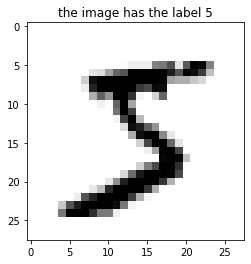

In [ ]:
import matplotlib.pyplot as plt

def show_image(i):
  image = ... # TODO: assign the i-th image from train_images
  label = ... # TODO: assign the i-th label from train_labels

  # we use the color-map (cm) binary in order to see the numbers as
  # black-on-white and not white-on-black.
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title('the image has the label ' + str(label))

# TODO: call the function show_image to show the first image

Als letzten Schritt mit den Daten wollen wir diese noch so aufbereiten, dass unser Model diese besser verwenden kann. Wir haben besprochen, dass das neuronale Netz jedes Bild als langen Vektor, also als 1D-Array, und nicht als Matrix, bzw. 2d-Array entgegen nimmt. Wir können dafür die Methode `reshape` verwenden, welche als Argument ein Tupel mit den neuen Dimensionen entgegen nimmt. Dabei müssen wir beachten, dass wir die gesamte Anzahl Elemente nicht verändern.

In [ ]:
train_images_input = ... # TODO: reshape the train images
test_images_input = ... # TODO: reshape the test images

# scaling of the values of the pixels into  0..1, usually helps when training
train_images_input = train_images_input.astype("float32") / 255
test_images_input = test_images_input.astype("float32") / 25

# TODO: check/print the shape of the training images

(60000, 784)

## Das Neuronale Netz

Als nächstes wollen wir ein neuronales Netz bauen. Dazu erstellen wir die einzelnen Layer und fügen diese dann in einer Reihe zu einem Model zusammen. Die Details müssen Sie nicht verstehen. Es reicht wenn Sie sehen, dass wir verschiedene Elemente zu etwas grösserem kombinieren.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

layer1 = layers.Dense(512, activation="relu")
# relu is a function with a kink at 0 like the following sketch: _/

outputLayer = layers.Dense(10, activation="softmax")
# softmax normalizes the values between 0.0 and 1.0, such that they sum to 1

model = keras.Sequential([
  layer1,
  outputLayer
])

Als nächstes müssen wir dem Model noch sagen, welchen Optimierungsalgorithmus wir nutzen wollen, welche Fehlerfunktion wir optimieren wollen und wie wir die Güte des Models messen. Darauf gehen wir hier nicht näher ein, sondern verwenden einfach das folgende.

In [ ]:
model.compile(
  optimizer="rmsprop",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)


Nun können wir unser Model trainieren. Dazu verwenden wir die Methode `fit`. Diese bekommt die Bilder und Labels fürs Training. Zusätzlich geben wir noch an wieviele Epochen `epochs` wir trainieren, also wie oft wir alle Trainingsdaten durch unser Model schicken. Als letzts geben wir noch an wie gross die Batchgrösse `batch_size` ist, also wieviele Bilder wir auf einmal durch unser Netzwerk schicken. Zurück bekommen wir den Verlauf des Trainings. Den wir danach visualisieren können.

In [ ]:
history = model.fit(train_images_input,train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0370 - accuracy: 0.9895
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0272 - accuracy: 0.9923
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0168 - accuracy: 0.9951


Wir können nun anschauen wie das Netzwerk lernt, also wie es mit der Zeit immer weniger Fehler macht.

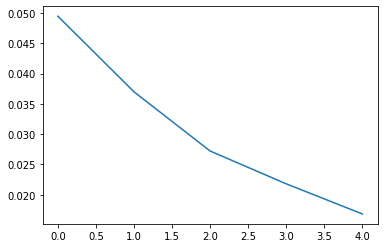

In [ ]:
history.history.keys()
evolution_of_loss_values = history.history["loss"]
evolution_of_loss_values
# TODO: simply plot the values to see it graphically

Noch bis vor dem Training war dem Model nicht klar wie gross die Eingabedaten sind. Deshalb konnten wir auch noch nicht schauen wie unser Netzwerk genau aussieht. Nun da die Grösse der Daten welche wir dem Netzwerk füttern bekannt ist, können wir schauen wie unser Model ausschaut und wieviele Parameter, also einzelne Zahlen wir gelernt haben.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Sie sehen, wir haben in diesem einfachen Model schon fast eine halbe Million Parameter. Grosse Netze welche in realen Szenarien angewendet werden, haben dann oft noch viel mehr Parameter. Diese da sie oft viel tiefer sind, also aus mehr Layern bestehen. 

## Testen und Analysieren

Nachdem das Netzwerk trainiert ist, wollen wir nun untersuchen wie gut unser Model neue Ziffern, welche nicht während dem Training gesehen wurden, klassifiziert werden können.

Dafür schauen wir zuerst an, wie wir unser Model verwenden können und was es für ein Bild der Testdaten zurück gibt.

In [ ]:
predictions = model.predict(test_images_input)
# TODO: show the size of the tensor
# TODO: print the prediction for the first image

(10000, 10)
Vorhersage für das erste Bild [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0064415e-36 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]


Für jedes Bild bekommen wir eine Wahrscheinlichkeit pro Ziffer. Diese gibt an wie wahrscheinlich es die jeweilige Ziffer ist. Wir können mit der Methode `argmax()` schauen, welches die Ziffer ist, die nach der Meinung unseres Netzes am wahrscheinlichsten im Bild vorkommt.

In [ ]:
predicted = predictions.argmax(axis=1)
print('Vorhergesagte Ziffer für das erste Bild', predicted[0])

Vorhergesagte Ziffer für das erste Bild 7



Für die Visualisierung der Vorhersage können wir uns erneut eine Funktion schreiben. Dies können wir analog zu der Funktion machen, welche wir verwendet haben um die Trainingsdaten anzuzeigen.

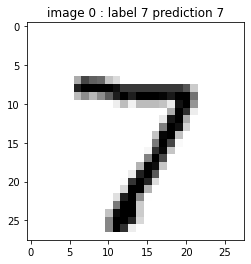

In [ ]:
def show_prediction(i):
  image = ... # TODO: assign image
  gt_label = ... # TODO: assign the test label
  predicted_label = ... # TODO: assign the predicted label
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title("image {} : label {} prediction {}".format(i,gt_label, predicted_label))
  plt.show()

show_prediction(0)


Nun können wir schauen ob wir öfters das richtige Label vorher sagen. Dafür schauen wir uns einmal die ersten 20 Vorhersagen an.

In [ ]:
# TODO: print the first 20 training labels and predicted labels

image 0 : label 7 preduction 7
image 1 : label 2 preduction 2
image 2 : label 1 preduction 1
image 3 : label 0 preduction 0
image 4 : label 4 preduction 4
image 5 : label 1 preduction 1
image 6 : label 4 preduction 4
image 7 : label 9 preduction 9
image 8 : label 5 preduction 5
image 9 : label 9 preduction 9
image 10 : label 0 preduction 0
image 11 : label 6 preduction 6
image 12 : label 9 preduction 9
image 13 : label 0 preduction 0
image 14 : label 1 preduction 1
image 15 : label 5 preduction 5
image 16 : label 9 preduction 9
image 17 : label 7 preduction 7
image 18 : label 3 preduction 3
image 19 : label 4 preduction 4


Machen wir wirklich keine Fehler?

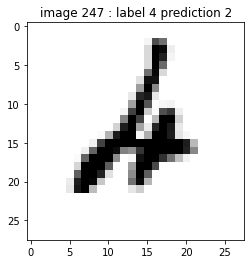

In [ ]:
show_prediction(247)

Um das Netzwerk mit allen Testdaten zu evaluieren, gibt es schon eine Evaluationsmethode.

In [ ]:
test_loss, test_acc = model.evaluate(test_images_input, test_labels)
print('test_acc: {}'.format(test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.9780
test_acc: 0.9779999852180481


## Fehlerfälle Visualisieren

Wir zeigen nun noch alle Fehlerfälle an. Können Sie die Fehler nachvollziehen?

In [ ]:
import IPython
import time
%matplotlib inline

# TODO: show prediction for error cases in a loop 
  
# add the following two lines in your loop to make the visualization nicer
IPython.display.clear_output(wait=True) # necessary to update the image
time.sleep(2) # wait for 2 seconds before you continue

KeyboardInterrupt: ignored

## Miniübungen
- Trainieren Sie das Model für mehr Iterationen.
- Erweitern Sie das Model und fügen Sie mehr Layer ein. Reduzieren sich die Fehler im Testset mit mehr Layern?
- Fügen Sie nach jedem `Dense`-Layer, ausser dem Output-Layer, einen Layer ein welchen Sie mit `layers.Dropout(0.2)` erstellen.
- Wenn Sie wollen können Sie nun noch etwas genauer analysieren ob das Netzwerk gewisse Ziffern öfters verwechselt als andere. Dafür können Sie für jedes Label anschauen wie oft welche andere Ziffer falsch vorhergesagt wird. Wenn Sie dies in eine Numpy Array speichern, können Sie das Ergebnis mit Pyplot plotten. Dafür starten Sie mit einem zweidimensionalen Numpy Array gefüllt mit Nullen. Bei jedem Fehler erhöhen Sie die Zahl im Array an der Stelle (gt_label,prediction).